mostrando valores punteada
[1. 0.]
[1.e+00 8.e+03]
mostrando valores naranja
[ 0.3660254 -0.3660254]
[1.         0.26794919]
mostrando valores violeta
[ 0.32316494 -0.32316494]
[1.         0.35367012]


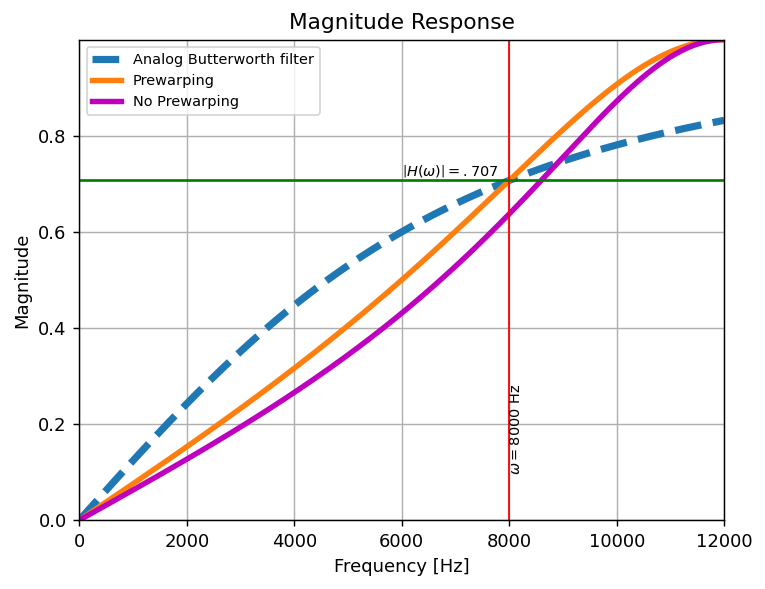

In [1]:
from numpy import pi, abs,array, arctan, tan,arange,linspace,max
from scipy.signal import freqz, freqs, butter, iirfilter
import matplotlib.pyplot as plt

fc=8000
fs=24000

#Analog Butterworth LPF
b = array([1., 0 ])     #   s
a = array([1., fc])     #   s+w0^2
#b, a = iirfilter(1, fc, btype='highpass', analog=True, ftype='butter')
print('mostrando valores punteada')
print(b)
print(a)

w, h = freqs(b,a, worN=linspace(0, fs/2, 512))
plt.figure(dpi=130)
plt.plot(w, abs(h), linestyle='dashed',linewidth=4, label='Analog Butterworth filter')

#High-pass IIR first-order Butterworth filter (Prewarping)

wa=tan((pi*fc)/fs)
b = 1/(wa+1)*array([1, -1])
a = array([1, (wa-1)/(wa+1)]) 

print('mostrando valores naranja')
print(b)
print(a)

w, h = freqz(b,a, worN=1024)
plt.plot(w*fs/(2*pi), abs(h), linewidth=3,label='Prewarping')

#High-pass IIR first-order Butterworth filter (No Prewarping)
wc= 2*pi*fc/fs
b = 1/(wc+1)*array([1, -1])
a = array([1, (wc-1)/(wc+1)])

print('mostrando valores violeta')
print(b)
print(a)

w, h = freqz(b,a, worN=1024)
plt.plot(w*fs/(2*pi), abs(h), linewidth=3,color='m',label='No Prewarping')

plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude Response')
plt.xlim(0, fs/2)

plt.axvline(fc, color='red',linewidth=1) # cutoff frequency
plt.axhline(0.707, color='green') 

plt.text((fs/4), .707+0.01, r'$\left | H(\omega) \right |=.707$',fontsize=8)
plt.text(fc, 0.1, r'$\omega=%.0f$ Hz' %fc, rotation=90,fontsize=8)
plt.grid(True)
plt.legend(loc = 'best',fontsize=8)

plt.margins(0, 0)

plt.show()

# Author
## Manuel AYALA

